# Fruits classification project in CNN

In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt                                                                                 

## Step 1 : Importation de données

In [3]:
img_height, img_width = 32,32
batch_size = 20
train_dataset = tf.keras.utils.image_dataset_from_directory("fruits/train", image_size=(img_height,img_width), batch_size=batch_size)
test_dataset = tf.keras.utils.image_dataset_from_directory("fruits/test", image_size=(img_height,img_width), batch_size=batch_size)
valid_dataset = tf.keras.utils.image_dataset_from_directory("fruits/validation", image_size=(img_height,img_width), batch_size=batch_size)

Found 460 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


## Step 2 : Visualisation des données

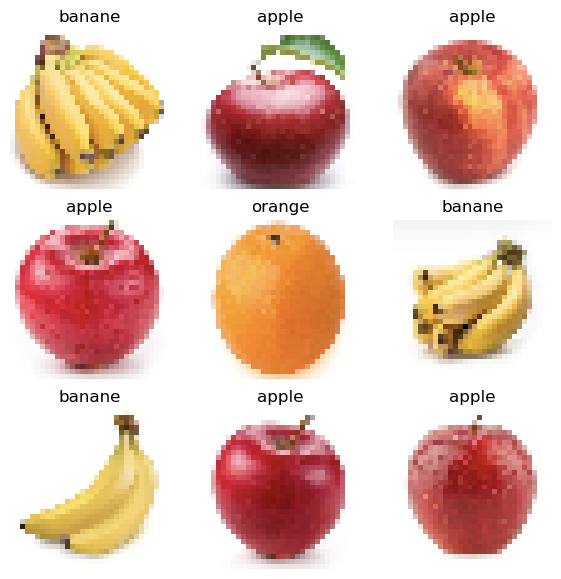

In [4]:
class_names = ['apple', 'banane','orange']
plt.figure(figsize=(7,7))
for img,labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()

## Step3: Création du modèle

In [5]:
modelCNN= tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

## Step4 : Paramétrage du modèle 

In [6]:
modelCNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Step5: Training

In [7]:
modelCNN.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.5241 - loss: 1.0134 - val_accuracy: 0.6970 - val_loss: 0.7516
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7963 - loss: 0.6134 - val_accuracy: 0.7576 - val_loss: 0.4951
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8220 - loss: 0.4496 - val_accuracy: 0.7424 - val_loss: 0.5333
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8574 - loss: 0.3464 - val_accuracy: 0.8636 - val_loss: 0.3410
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9067 - loss: 0.2514 - val_accuracy: 0.7121 - val_loss: 0.6884
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8367 - loss: 0.3915 - val_accuracy: 0.8485 - val_loss: 0.3966
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9086 - loss: 0.2334 - val_accuracy: 0.9545 - val_loss: 0.1655
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9539 - loss: 0.1681 - val_accuracy: 0.8939 - 

## Step 6 : test

In [8]:
modelCNN.evaluate(test_dataset,verbose=2)

7/7 - 1s - 137ms/step - accuracy: 0.9462 - loss: 0.1976


[0.1976497918367386, 0.9461538195610046]